# CitiBike Matplotlib Visualizations

## Table of Contents
01. Libraries/Imports
02. Data Inspection
03. Temperatures Lineplot (2022)
04. Aggregate Trips
05. Dual Axes Plotting
06. Bonus Tasks
       - Trip Duration Plotting
       - 2 Axes Visualization
       

## 01. Libraries/Imports

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# Import NY Dataset
ny_data_df = pd.read_csv("../02_Data/Prepared_Data/NY_data.csv")

C:\Users\Chase\AppData\Local\Temp\ipykernel_30920\3338482159.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  ny_data_df = pd.read_csv("../02_Data/Prepared_Data/NY_data.csv")


## 02. Data Inspection

In [3]:
ny_data_df.shape

(29838166, 16)

In [4]:
ny_data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,2022-01-01,11.6,both
1,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,both
2,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,both
3,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,2022-01-01,11.6,both
4,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,2022-01-01,11.6,both


In [5]:
# Check columns
ny_data_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [6]:
ny_data_df.info

<bound method DataFrame.info of                    ride_id  rideable_type               started_at  \
0         4A091640AEC83471   classic_bike  2022-01-01 16:01:22.082   
1         7A560D6287C00126   classic_bike  2022-01-01 14:07:04.344   
2         4F6F726B809C15E4   classic_bike  2022-01-01 12:02:26.943   
3         3BC10DC94FD79955   classic_bike  2022-01-01 22:53:23.508   
4         FE4CE7F1CFFD7952   classic_bike  2022-01-01 08:04:51.755   
...                    ...            ...                      ...   
29838161  F2C4F070A50F9F3B   classic_bike  2022-12-31 13:09:50.131   
29838162  79F3ED73A2BF585C   classic_bike  2022-12-31 17:33:04.512   
29838163  DDED85920D307CE1   classic_bike  2022-12-31 09:14:53.652   
29838164  98C9073F2BD6A968   classic_bike  2022-12-31 11:08:40.394   
29838165  4ACAA87B0BAD4FFF  electric_bike  2022-12-31 05:08:13.457   

                         ended_at  \
0         2022-01-01 16:05:11.986   
1         2022-01-01 14:31:57.500   
2         2022-0

In [7]:
ny_data_df.describe()

,start_lat,start_lng,end_lat,end_lng,avgTemp
count,2.983817e+07,2.983817e+07,2.980094e+07,2.980094e+07,2.983817e+07
mean,4.074057e+01,-7.397525e+01,4.074035e+01,-7.397535e+01,1.712278e+01
std,3.891776e-02,2.580544e-02,3.885548e-02,2.582301e-02,8.553446e+00
min,4.062737e+01,-7.402802e+01,4.056000e+01,-7.428000e+01,-1.170000e+01
25%,4.071605e+01,-7.399379e+01,4.071602e+01,-7.399380e+01,1.140000e+01
50%,4.073936e+01,-7.398166e+01,4.073932e+01,-7.398166e+01,1.790000e+01
75%,4.076319e+01,-7.395928e+01,4.076313e+01,-7.395943e+01,2.410000e+01
max,4.088398e+01,-7.387859e+01,4.106000e+01,-7.375000e+01,3.130000e+01


In [8]:
ny_data_df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

## 03. Temperatures Lineplot (2022)

In [9]:
# Change the 'date' column to date-time
ny_data_df['date'] = pd.to_datetime(ny_data_df['date'], errors='coerce')

In [10]:
# Work check
ny_data_df['date'].dtype

dtype('<M8[ns]')

In [11]:
# Double check the dates to ensure no year anomailes
ny_data_df['date'].dt.year.unique()

array([2022], dtype=int32)

In [12]:
# Set date as index to build a proper time-series plot
weather_2022 = ny_data_df.set_index('date')

<Axes: title={'center': 'Daily Average Temperature in 2022'}, xlabel='date'>

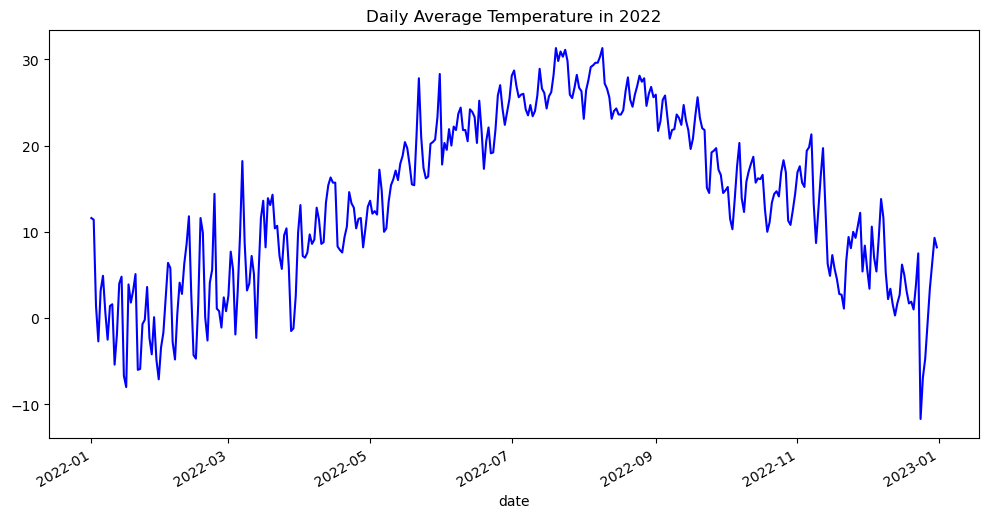

In [13]:
# Plot the temperature time series
weather_2022['avgTemp'].plot(
    figsize=(12, 6),
    color="blue",
    title='Daily Average Temperature in 2022'
)

## 04. Aggregate Trips 

In [14]:
# Groupby the count of the trips 

df_group = pd.DataFrame(ny_data_df.groupby(['date'])['ride_id'].count()).reset_index()

In [15]:
# Work check
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [16]:
# Group daily ride counts into bike_rides_daily
df_group = (
    ny_data_df.groupby('date')['ride_id']
    .count()
    .reset_index(name='bike_rides_daily')
)

In [17]:
# Merge new column back into main ny_data_df
ny_data_df = ny_data_df.merge(df_group, on='date', how='left')

In [18]:
# Work check on the merge
ny_data_df['bike_rides_daily'].isna().sum()

np.int64(0)

## 05. Dual Axes Plotting

In [19]:
# Set index for plotting
df_temp = ny_data_df.set_index('date')

In [20]:
# Work Check
print(df_temp.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'bike_rides_daily'],
      dtype='object')


In [21]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,bike_rides_daily
date,,,,,,,,,,,,,,,,
2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,both,20428
2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,both,20428
2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,both,20428
2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,both,20428
2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,both,20428


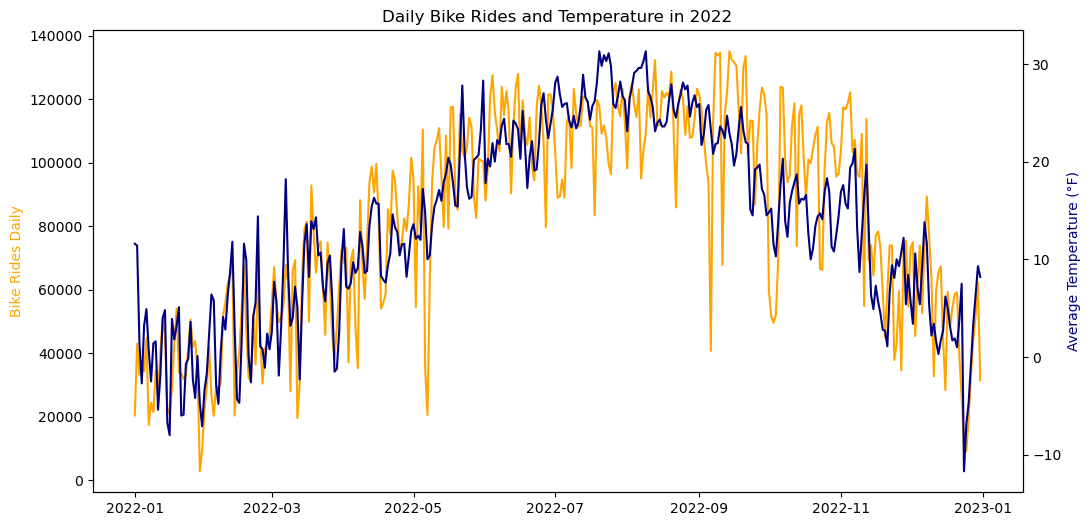

In [22]:
# Dual Axis plot

fig, ax1 = plt.subplots(figsize=(12, 6))

# First line: bike rides
ax1.plot(df_temp['bike_rides_daily'], color='orange')
ax1.set_ylabel('Bike Rides Daily', color='orange')

# Second axis for temperature
ax2 = ax1.twinx()
ax2.plot(df_temp['avgTemp'], color='navy')
ax2.set_ylabel('Average Temperature (°F)', color='navy')

plt.title('Daily Bike Rides and Temperature in 2022')
plt.show()


I used Matplotlib's OO (object-oriented) approach to create the dual (twin) axes. I followed the reading's instructions and created the first line plot with ax1, the daily bike ride counts (orange line). Then, I proceeded to create ax2 = ax1.twin() to properly create a subplot that would work with the first line. Then, I proceeded to create the temp line (navy line) with ax2 and set it with the avgtemp data. I applied labels to both sides of the chart so you can see the scales. Copilot's idea, and I liked it. Once the code was built, I ran it, and you can see the above results.

## 06. Bonus Tasks

### Trip Duration Plotting

Going to use the start_at anad end_at columns to create an aggregated column output for this.

In [23]:
# Convert this columns to be a datetime column

ny_data_df['started_at'] = pd.to_datetime(ny_data_df['started_at'])
ny_data_df['ended_at'] = pd.to_datetime(ny_data_df['ended_at'])

In [24]:
# Create the tripduration column by subtracting the start time from the end time. Then didvied by 60sec
ny_data_df['tripduration'] = (
    ny_data_df['ended_at'] - ny_data_df['started_at']
).dt.total_seconds() / 60

In [25]:
# Work Check
ny_data_df['tripduration'].isna().sum()

np.int64(0)

In [26]:
# Work Check on the columns
ny_data_df[['started_at', 'ended_at', 'tripduration']].head()

,started_at,ended_at,tripduration
0,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,3.831733
1,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,24.885933
2,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,11.776867
3,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,25.322883
4,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,3.258917


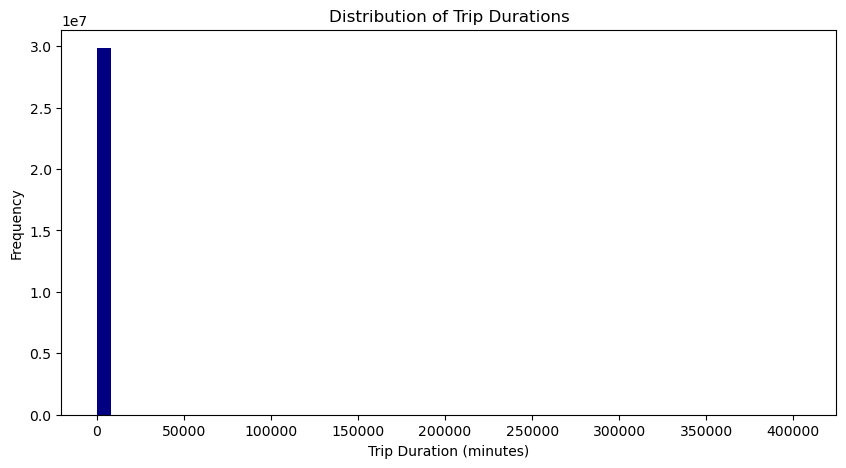

In [27]:
# Plot the tripduration 

plt.figure(figsize=(10, 5))
plt.hist(ny_data_df['tripduration'], bins=50, color='navy')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()

Something is off with this output with a single bar of data. Are minutes the best choice for this?

In [28]:
ny_data_df['tripduration'].sort_values(ascending=False).head(10)

1913636     404481.005867
7391362     245844.489567
5278571     222963.355517
5278572     221708.067467
6423444     218938.468033
7579651     217665.979000
16155067    212724.723550
14152166    211816.309650
6328787     211415.575483
13116483    196583.615600
Name: tripduration, dtype: float64

In [29]:
# Convert minutes to hours
ny_data_df['tripduration_hours'] = ny_data_df['tripduration'] / 60

In [30]:
# Check for trip outliers
ny_data_df[ny_data_df['tripduration_hours'] > 24].shape

(39772, 19)

There are many outliers that could be caused by many factors. I will isolate them inorder to build a more accurate histogram.

In [31]:
# Isolate extreme trips
extreme_trips = ny_data_df[ny_data_df['tripduration'] > 1440]

In [32]:
extreme_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,bike_rides_daily,tripduration,tripduration_hours
10101,3F8F60B07EE40631,classic_bike,2022-01-01 04:19:44.974,2022-01-07 14:48:39.377,W 36 St & 7 Ave,6483.06,3 Ave & E 62 St,6762.04,40.752149,-73.989539,40.763126,-73.965269,casual,2022-01-01,11.6,both,20428,9268.906717,154.481779
15568,AE637C5202D0D520,classic_bike,2022-01-01 04:00:31.097,2022-01-02 21:22:59.084,31 St & Northern Blvd,6495.17,36 Ave & 31 St,6572.08,40.751870,-73.933493,40.756513,-73.929575,casual,2022-01-01,11.6,both,20428,2482.466450,41.374441
16391,4FAAB91187E83430,classic_bike,2022-01-01 17:50:06.239,2022-01-02 18:50:02.560,E 11 St & 1 Ave,5746.14,NaN,NaN,40.729538,-73.984267,NaN,NaN,member,2022-01-01,11.6,both,20428,1499.938683,24.998978
16393,BBAAEC6BF90AEFA9,classic_bike,2022-01-01 02:21:40.630,2022-01-02 03:21:36.333,Grand St & Greene St,5500.02,NaN,NaN,40.721700,-74.002381,NaN,NaN,member,2022-01-01,11.6,both,20428,1499.928383,24.998806
16394,737AAAF2F97C59A5,classic_bike,2022-01-01 03:09:16.519,2022-01-02 04:09:11.905,Carroll St & Smith St,4225.14,NaN,NaN,40.680611,-73.994758,NaN,NaN,member,2022-01-01,11.6,both,20428,1499.923100,24.998718


In [33]:
# Create a cleaned dataset for this histogram
clean_df = ny_data_df[ny_data_df['tripduration'] <= 1440]

In [34]:
# Look at the top 10 trip durations
clean_df['tripduration_hours'].sort_values(ascending=False).head(10)

26404412    23.999238
26405060    23.999090
26405108    23.998985
26404938    23.998958
26404872    23.998907
26404241    23.998891
26404160    23.998863
26404698    23.998860
26404793    23.998850
26405167    23.998849
Name: tripduration_hours, dtype: float64

In [35]:
# Look at the tripduration info for the cleaned data
clean_df['tripduration_hours'].describe()

count    2.979839e+07
mean     2.580883e-01
std      5.545884e-01
min     -9.548153e-01
25%      9.652639e-02
50%      1.691306e-01
75%      2.991789e-01
max      2.399924e+01
Name: tripduration_hours, dtype: float64

Looking at the above tells me that there are more outliers, negative and positive. I will make the x-axis scale 0-5 hours to filter out the outliers. 
NOTE: I tried filtering these out, and it was too much for my system to handle. 

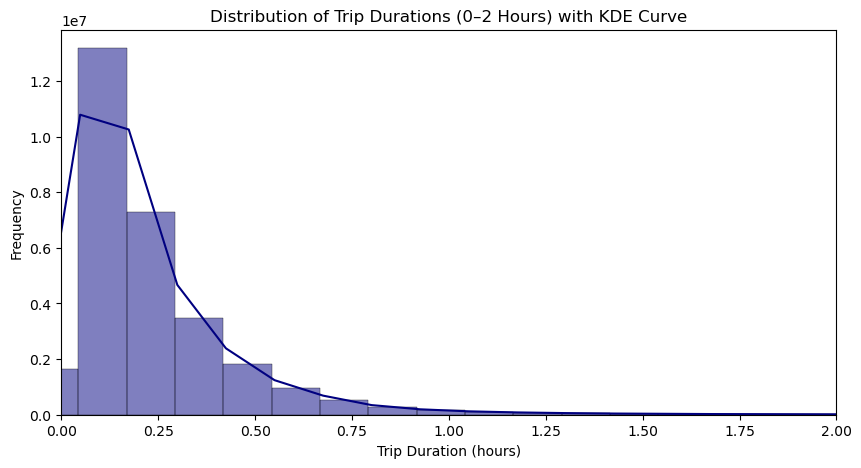

In [42]:
# Plot with the curve (KDE)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.histplot(
    clean_df['tripduration_hours'],
    bins=200,
    kde=True,
    color='navy'
)

plt.xlim(0, 2)         # Zoom in to the meaningful range
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations (0–2 Hours) with KDE Curve')
plt.show()

### 2 Axes Visualization

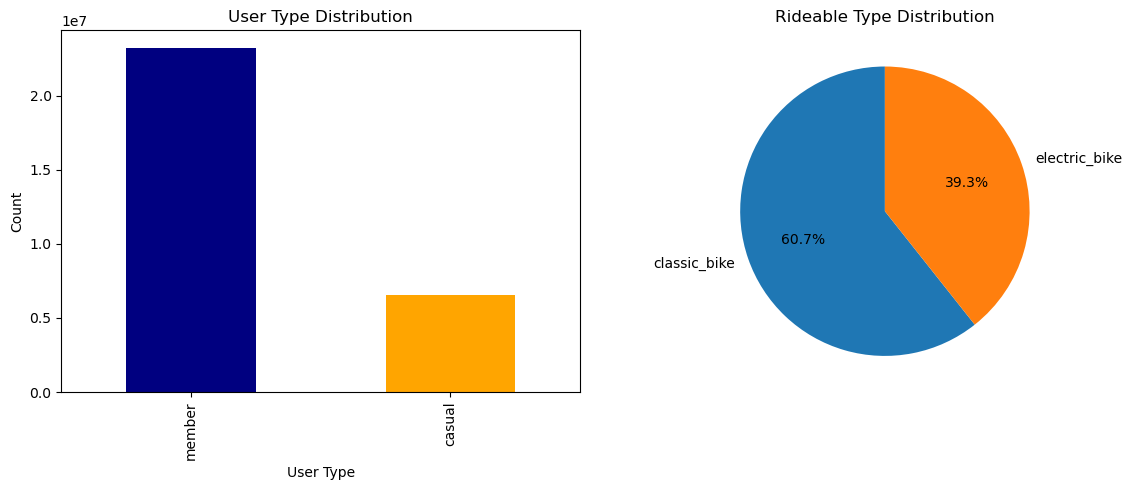

In [45]:
# Create the 2 axes Visualization

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for usertype
clean_df['member_casual'].value_counts().plot(
    kind='bar',
    ax=ax1,
    color=['navy', 'orange']
)
ax1.set_title('User Type Distribution')
ax1.set_xlabel('User Type')
ax1.set_ylabel('Count')

# Note: There isn't a gender column or data, so in place of it, I used rideable_type.
# Pie chart for rideable_type (stand-in for gender)
clean_df['rideable_type'].value_counts().plot(
    kind='pie',
    ax=ax2,
    autopct='%1.1f%%',
    startangle=90
)
ax2.set_title('Rideable Type Distribution')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()